In [12]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [13]:
def central_field_approximation(r : float, Z : float) -> float:
	return Z**3 * 4 * r**2 * np.exp(-2 * Z * r)

In [14]:
def theta(r_1 : npt.NDArray, r_2 : npt.NDArray) -> npt.NDArray:
  dot_over_norm = np.sum(r_1*r_2, axis=1)  / (np.linalg.norm(r_1, axis=1) * np.linalg.norm(r_2, axis=1))
  return np.arccos(dot_over_norm)

In [15]:
def energy(r_1, r_2, alpha):
	unit_difference = (r_1/np.linalg.norm(r_1, axis=1).reshape(-1,1) - r_2/np.linalg.norm(r_2, axis=1).reshape(-1,1))
	difference = r_1 - r_2
	differene_dot = np.sum(unit_difference*difference, axis=1)
	r_1_2 = np.linalg.norm(difference)
	denominator = (1 + alpha*r_1_2)
	
	return - 4 + differene_dot / (r_1_2 * denominator**2) - 1 / (r_1_2 * denominator**3) - 1 / (4 * denominator**4) + 1/r_1_2


In [16]:
data = np.genfromtxt("../data/data_n1000000_neq0_alpha_0.100.csv", delimiter=",")

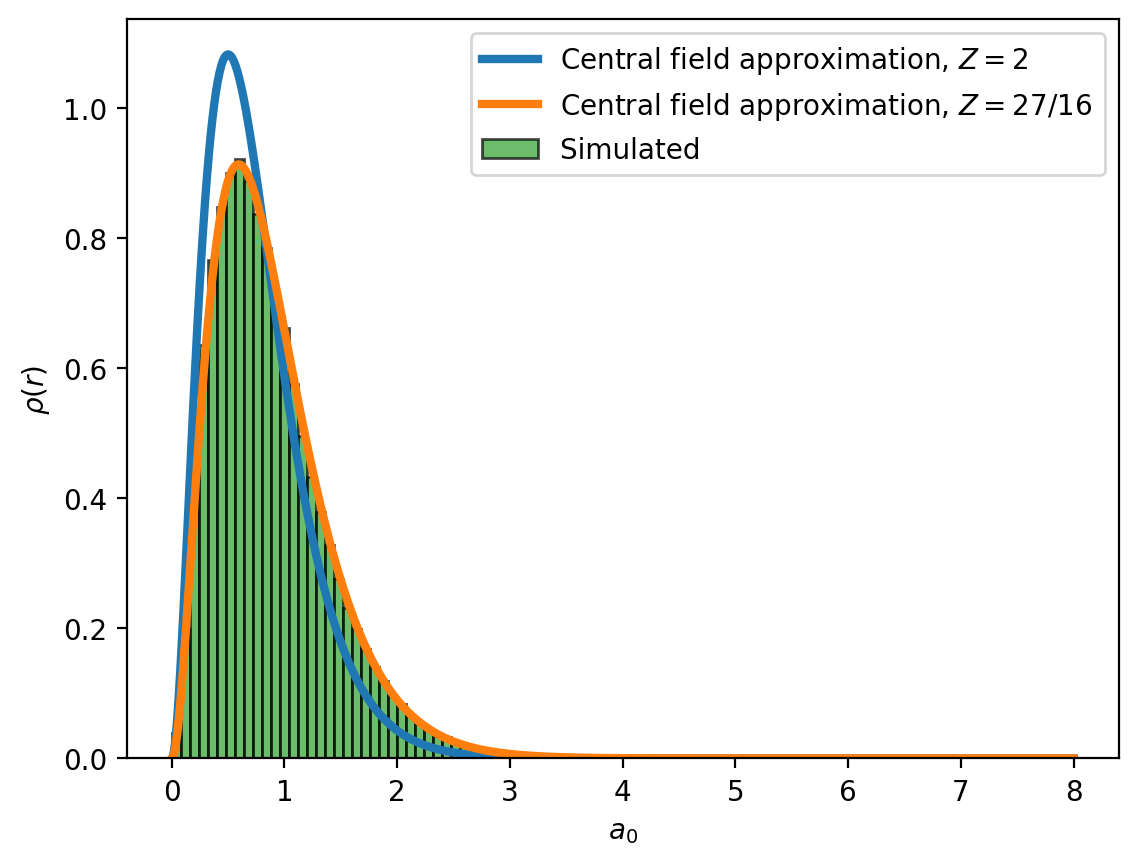

In [17]:
only_positions = data[:,:6]
only_positions = only_positions.reshape(-1,3)
only_lenths = np.linalg.norm(only_positions, axis=1)
x = np.linspace(0,8,1000)



c_f_a = central_field_approximation(x, 2)
plt.plot(x,c_f_a, label= r'Central field approximation, $Z = 2$ ', linewidth=3)

c_f_a = central_field_approximation(x, 27/16)
plt.plot(x,c_f_a, label= r'Central field approximation, $Z = 27/16$ ', linewidth=3)

plt.hist(only_lenths, bins=100, density=True, range=(0,8), alpha=0.7, label='Simulated ', edgecolor='black')

plt.xlabel('$a_0$')
plt.ylabel(r'$\rho (r)$')
plt.legend();plt.show()

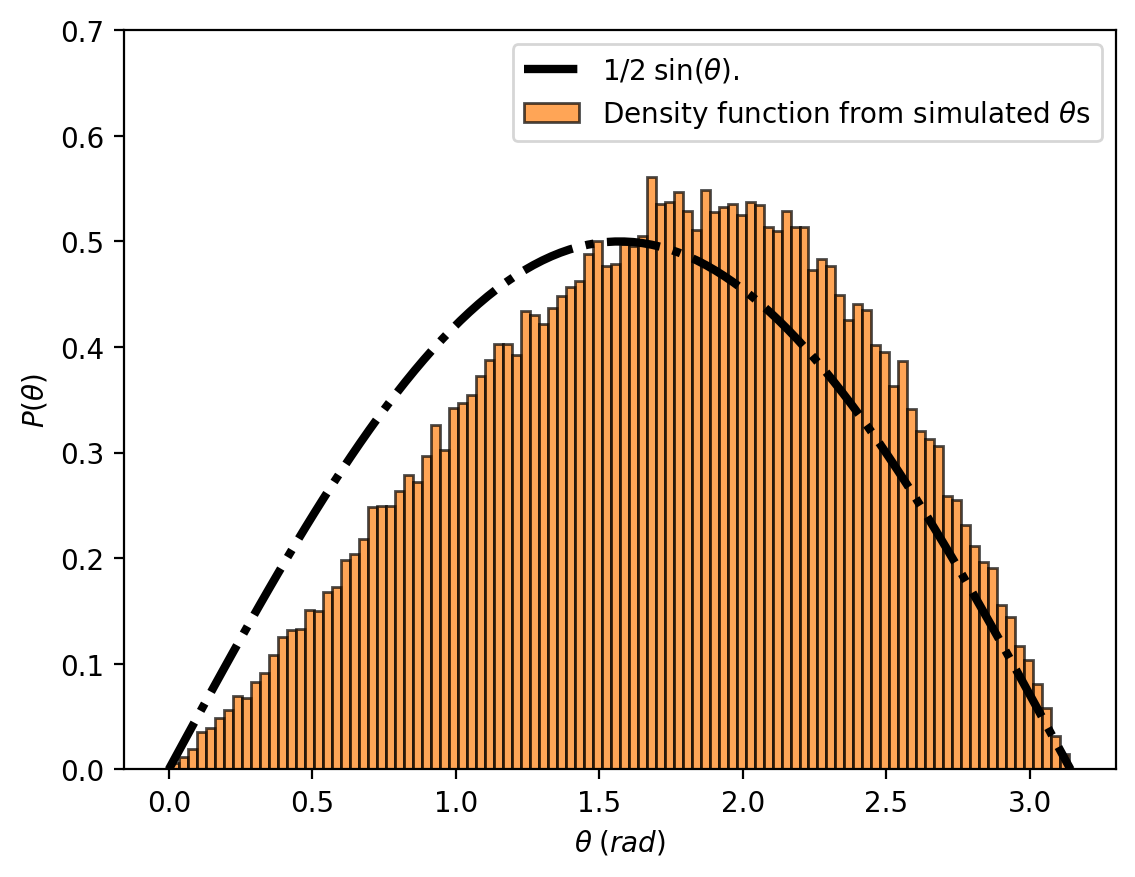

In [18]:
thetas = theta(data[:,:3], data[:,3:6])
# plt.plot(thetas)
# plt.title(f'Max theta = {np.max(thetas)}, min theta = {np.min(thetas)}.')
# plt.show()
x = np.linspace(0,np.pi,100)

plt.plot(x,np.sin(x)/2, '-.',label=r'$1/2\;\sin(\theta)$.', linewidth=3, color='black')
plt.hist(thetas, bins=100, color='#ff7f0e',label=r'Density function from simulated $\theta $s', density=True, alpha=0.7, edgecolor='black')
plt.xlabel(r'$\theta\;(rad)$')
plt.ylim((0,.7))
plt.ylabel(r'$P(\theta)$')
plt.legend()
plt.show()

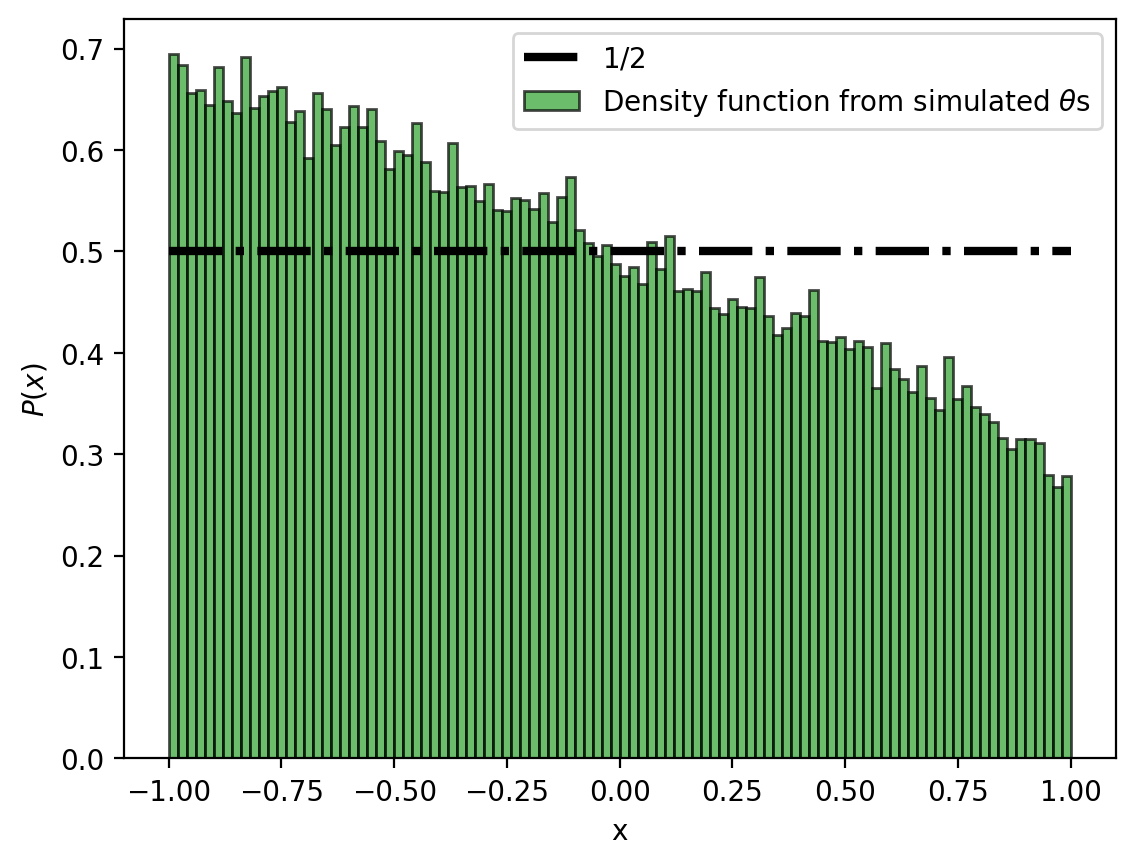

In [19]:
coses = np.cos(thetas)

plt.plot([-1,1],[1/2,1/2], '-.',label='$1/2$', linewidth=3, color='black')
plt.hist(coses, bins=100, density=True, alpha=0.7, edgecolor='black',color='#2ca02c', label=r'Density function from simulated $\theta$s')
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend()
plt.show()


C:\Users\olefj\AppData\Local\Temp\ipykernel_20388\1582262583.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(cum_energy/(np.arange(cum_energy.shape[0])), label='$E_L$, time averaged ', linewidth=2)


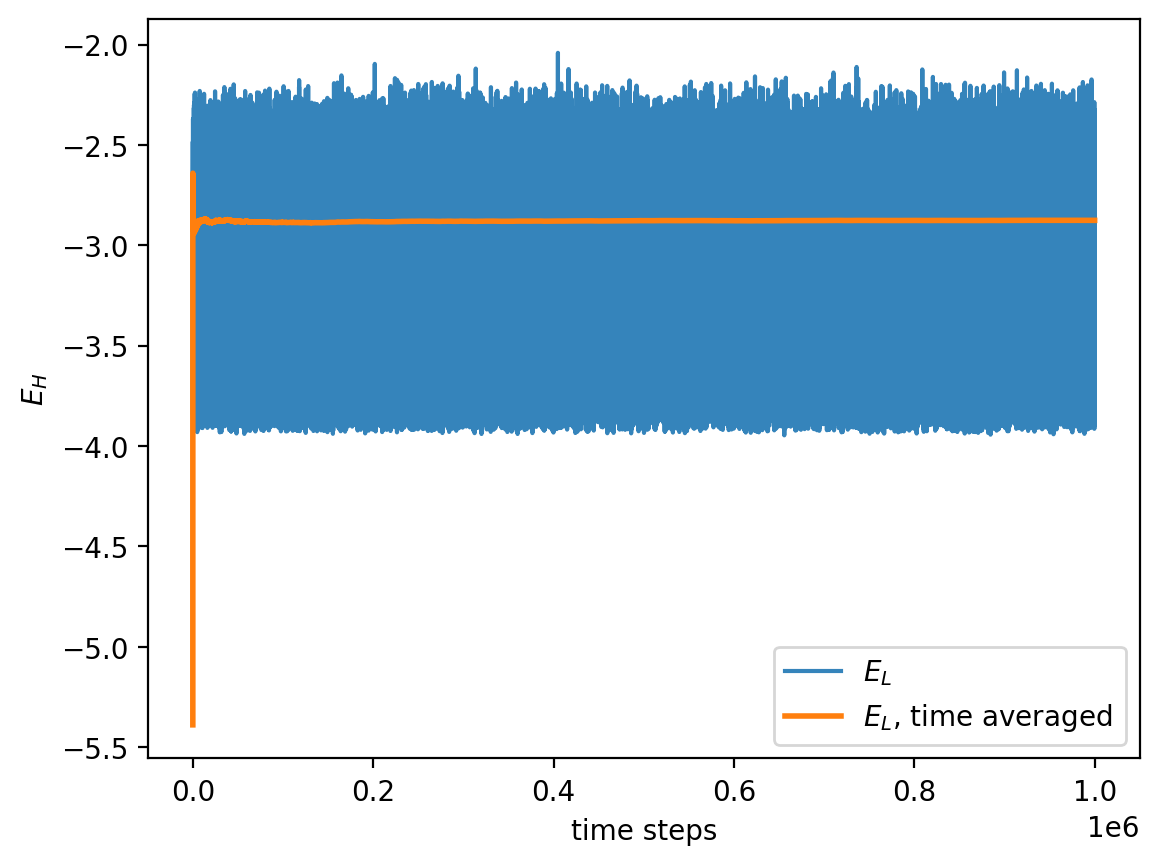

-2.875750813182489
-2.8788863284935906


C:\Users\olefj\AppData\Local\Temp\ipykernel_20388\1582262583.py:8: RuntimeWarning: divide by zero encountered in divide
  print((cum_energy/(np.arange(cum_energy.shape[0])))[-1])
C:\Users\olefj\AppData\Local\Temp\ipykernel_20388\1582262583.py:9: RuntimeWarning: divide by zero encountered in divide
  print(np.mean((cum_energy/(np.arange(cum_energy.shape[0])))[20000:]))


In [20]:
cum_energy = np.cumsum(data[:,-1])
plt.plot(data[:,-1], label='$E_L$',alpha=0.9)
plt.plot(cum_energy/(np.arange(cum_energy.shape[0])), label='$E_L$, time averaged ', linewidth=2)
plt.xlabel('time steps')
plt.ylabel('$E_H$')
plt.legend()
plt.show()
print((cum_energy/(np.arange(cum_energy.shape[0])))[-1])
print(np.mean((cum_energy/(np.arange(cum_energy.shape[0])))[20000:]))